In [3]:
pip install pandas numpy scikit-learn matplotlib seaborn xgboost

Note: you may need to restart the kernel to use updated packages.Collecting pandas
  Using cached xgboost-2.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 1.7 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/11.5 MB 1.5 MB/s eta 0:00:08
   ----- ---------------------------------- 1.6/11.5 MB 1.6 MB/s eta 0:00:07
   ------ --------------------------------- 1.8/11.5 MB 1.6 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.5 MB 1.7 MB/s eta 0:00:06
   --------- ------------------------------ 2.6/11.5 MB 1.7 MB/s eta 0:00:06
   ---------- ----------------------------- 3.1/11.5 MB 1.7 MB/s eta 0:00:05
   ------------ --------------------------- 3.7/11.5 MB 1.8 MB/s eta 0:00:05
   -------------- ------------------------- 4.2/11.5 MB 1.8 MB/s eta 0:00:05
   --------------- ------------------------ 4.5/11.5 MB 1.8 MB/s eta 0:00:04
   ----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb

data=pd.read_csv("heart_cleveland_upload.csv")
data.head(30)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [22]:
# Rellenar ceros por la media de cada columna si es necesario
data[['trestbps', 'chol', 'thalach', 'oldpeak']] = data[['trestbps', 'chol', 'thalach', 'oldpeak']].replace(0, data.mean())

# Convertir variables categóricas
data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

# Separar variables independientes y la variable objetivo
X = data.drop(columns=['condition'])
y = data['condition']


In [23]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)


c:\Users\frank\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.78      0.75      0.76        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



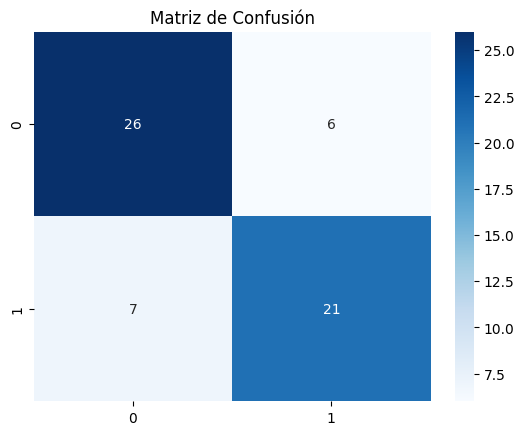

AUC-ROC: 0.8493303571428572


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Realizar predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", roc_auc)


In [28]:
print("Cantidad de registros con cero en edad: ", data['age'].isin([0]).sum())
print("Cantidad de registros con cero en presión sanguínea: ", data['trestbps'].isin([0]).sum())
print("Cantidad de registros con cero en colesterol: ", data['chol'].isin([0]).sum())
print("Cantidad de registros con cero en frecuencia cardíaca máxima: ", data['thalach'].isin([0]).sum())
print("Cantidad de registros con cero en depresión ST: ", data['oldpeak'].isin([0]).sum())
print("Cantidad de registros con cero en número de vasos principales: ", data['ca'].isin([0]).sum())


Cantidad de registros con cero en edad:  0
Cantidad de registros con cero en presión sanguínea:  0
Cantidad de registros con cero en colesterol:  0
Cantidad de registros con cero en frecuencia cardíaca máxima:  0
Cantidad de registros con cero en depresión ST:  0
Cantidad de registros con cero en número de vasos principales:  174
